Autores: Alexandre, Gustavo Guerreiro e João Martinho.

Importações das bibliotecas necessárias

In [2]:
import tensorflow as tf
import os
import pathlib

from tensorflow.python.data import AUTOTUNE

Definindo os diretórios do dataset

In [3]:
dir_dados = pathlib.Path('Dataset Alzheimer')
dir_treino = dir_dados / 'train'
dir_teste = dir_dados / 'test'

Carregando os imagens automaticamente para o TensorFlow.

In [5]:
img_height = 176
img_width = 208
batch_size = 32

dataset_treino = tf.keras.utils.image_dataset_from_directory(
    dir_treino,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

dataset_teste = tf.keras.utils.image_dataset_from_directory(
    dir_teste,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

print('Classes encontradas:', dataset_treino.class_names)

Found 5121 files belonging to 4 classes.
Found 1279 files belonging to 4 classes.
Classes encontradas: ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


Normalizando a imagem para ficar mais natural para a CNN.

In [7]:
def normalizar_img(imagem, rotulo):
    imagem = tf.cast(imagem, tf.float32) / 255.0
    return imagem, rotulo

dataset_treino = dataset_treino.map(normalizar_img)
dataset_teste = dataset_teste.map(normalizar_img)

Configurando operações de cache e prefetch para aprimorar desempenho.

In [8]:
from tensorflow.data import AUTOTUNE

dataset_treino = dataset_treino.cache().shuffle(800).prefetch(buffer_size=AUTOTUNE)
dataset_teste = dataset_teste.cache().prefetch(buffer_size=AUTOTUNE)

Iniciando a configuração do modelo.

In [9]:
from tensorflow.keras import layers, models

modelo = models.Sequential([
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(4, activation='softmax'),
])

C:\Users\guto_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compilando o modelo com a definição de otimizador (Adaptive Moment Estimation), perda e métricas.

In [12]:
modelo.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Treinando o modelo

In [13]:
history = modelo.fit(
    dataset_treino,
    validation_data=dataset_teste,
    epochs=5
)

Epoch 1/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.5905 - loss: 1.0404 - val_accuracy: 0.5958 - val_loss: 0.9244
Epoch 2/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.8375 - loss: 0.4811 - val_accuracy: 0.5606 - val_loss: 1.2973
Epoch 3/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9566 - loss: 0.2145 - val_accuracy: 0.5950 - val_loss: 1.2586
Epoch 4/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9871 - loss: 0.0986 - val_accuracy: 0.5880 - val_loss: 1.2691
Epoch 5/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.9977 - loss: 0.0472 - val_accuracy: 0.5966 - val_loss: 1.5787


Avaliando os resultados do treino

In [14]:
perda, acuracia = modelo.evaluate(dataset_teste)

print(f"Acurácia: {acuracia:.2f}")
print(f"Perda: {perda:.2f}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5966 - loss: 1.5787
Acurácia: 0.60
Perda: 1.58


Métricas mais avançadas com sklearn

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

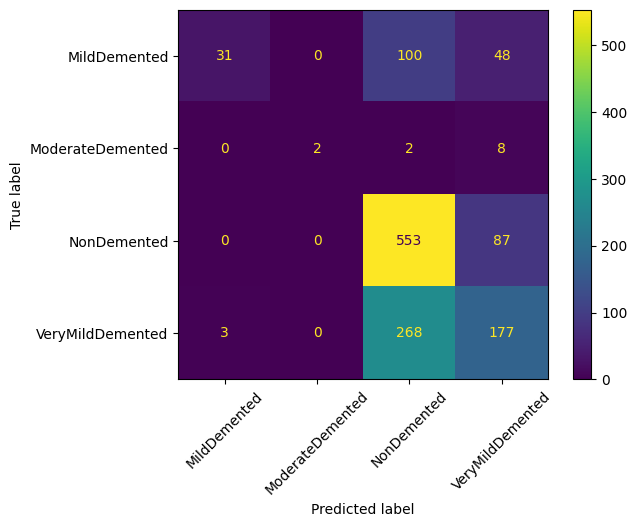

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
from matplotlib import pyplot as plt

y_verdadeiro = []
y_previsto = []

for imagens, rotulos in dataset_teste:
    previsoes = modelo.predict(imagens)
    y_verdadeiro.extend(rotulos.numpy())
    y_previsto.extend(np.argmax(previsoes, axis=1))

classes = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
cm = confusion_matrix(y_verdadeiro, y_previsto)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(xticks_rotation=45)
plt.show()